# Estadística Aplicada
## Cinthya YeseniaLópez Díaz 1658003
### 4 mayo de 2023

In [1]:
#pronóstico de prueba
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
#modelo arma
from statsmodels.tsa.arima.model import ARIMA 

In [3]:
igae = pd.read_excel('IGAE.xlsx')

In [6]:
#SON DATOS MENSUALES
igae

,Periodos,IGAE
0,2000-01-01,79.325572
1,2000-02-01,78.799329
2,2000-03-01,78.714380
3,2000-04-01,79.247601
4,2000-05-01,79.795178
...,...,...
273,2022-10-01,113.237145
274,2022-11-01,112.815614
275,2022-12-01,113.276229
276,2023-01-01,113.982481


Declarar una variable de tiempo y convertirla en el index

In [5]:
#declarar variable de tiempo
igae['Periodos'] = pd.to_datetime(igae['Periodos'],format='%Y/%m')

In [7]:
#convertir a la variable de tiempo en index
igae = igae.set_index('Periodos')

In [8]:
igae.head()
#si sale en negrita es porque ya es el index

,IGAE
Periodos,
2000-01-01,79.325572
2000-02-01,78.799329
2000-03-01,78.714380
2000-04-01,79.247601
2000-05-01,79.795178


In [9]:
#determinar la frecuencia de la serie
igae = igae.asfreq('MS')

In [11]:
igae.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01'],
              dtype='datetime64[ns]', name='Periodos', length=278, freq='MS')

El dataframe ya tiene el tiempo como index y hay una frecuencia de tiempo establecida, por tanto se puede proceder al análisis de series de tiempo.

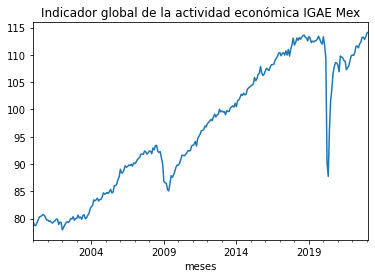

In [12]:
#se va a gráficar la serie
igae['IGAE'].plot()
plt.title('Indicador global de la actividad económica IGAE Mex')
plt.xlabel('meses');

Enfoque clásico (EC): la serie tiene tendencia positiva y muestra ciclos (crisis)

Enfoque estocástico (EE) : Parece una caminata aleatoria con deriva positiva (No estacionarios)

## Pronóstico
1. Realizando la prueba de raíz unitaria

In [13]:
#Prueba de raíz unitaria (dickey-fuller aumentada)
ADF_test1 = adfuller(igae['IGAE'])
#Ho : serie No estacionaria
alpha = 0.05
#regla de decisión
if ADF_test1[1] < alpha:
    print('Rechazamos Ho, la serie es estacionaria')
else:
    print('No rechazamos Ho, la serie es No estacionaria')

No rechazamos Ho, la serie es No estacionaria


Si la serie es No estacionaria tenemos que hacerla estacionaria; aplicando primeras diferencias

$\Delta Y_t = Y_t - Y_{t-1}$

In [14]:
#calculamos primeras diferencias de la serie
igae['igae_diferenciado'] = igae['IGAE'].diff()

In [15]:
igae

,IGAE,igae_diferenciado
Periodos,,
2000-01-01,79.325572,NaN
2000-02-01,78.799329,-0.526243
2000-03-01,78.714380,-0.084950
2000-04-01,79.247601,0.533221
2000-05-01,79.795178,0.547577
...,...,...
2022-10-01,113.237145,0.038213
2022-11-01,112.815614,-0.421531
2022-12-01,113.276229,0.460615


In [17]:
#comprobar si ahora esta nueva serie es estacionaria
ADF_test2 = adfuller(igae['igae_diferenciado'].dropna())
#Ho : serie No estacionaria
alpha = 0.05
#regla de decisión
if ADF_test2[1] < alpha:
    print('Rechazamos Ho, la serie es estacionaria')
else:
    print('No rechazamos Ho, la serie es No estacionaria')

Rechazamos Ho, la serie es estacionaria


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


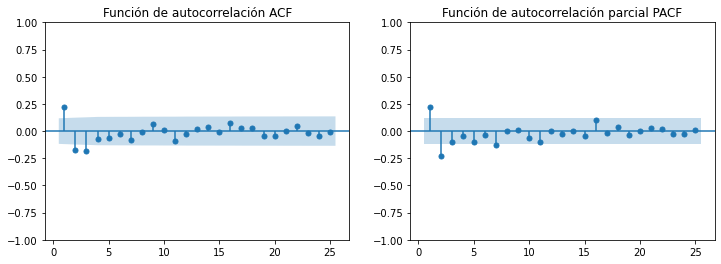

In [19]:
#ya que la serie es estacionaria se puede determinar que tipo de proceso es
fig, ax = plt.subplots(1,2, figsize=(12,4))
#subgrafica 0
plot_acf(igae['igae_diferenciado'].dropna(), zero=False,ax=ax[0],title='Función de autocorrelación ACF')
ax[0].set_ylim(-1,1)
#subgrafica 1
plot_pacf(igae['igae_diferenciado'].dropna(), zero=False, ax=ax[1],title='Función de autocorrelación parcial PACF')
ax[1].set_ylim(-1,1)
plt.show()

ARIMA (p, I, q)

p es el orden AR

q es ek orden MA

I el grado de integración, es cuantas veces aplicamos primeras diferencias a la serie que queremos pronosticar

In [20]:
#queremos pronosticar el IGAE (I=1)
modelo1 = ARIMA(igae['IGAE'],order=(2,1,0))
resultado1 = modelo1.fit()
print(resultado1.summary())

                               SARIMAX Results                                
Dep. Variable:                   IGAE   No. Observations:                  278
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -485.360
Date:                Thu, 04 May 2023   AIC                            976.721
Time:                        14:46:50   BIC                            987.593
Sample:                    01-01-2000   HQIC                           981.083
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2798      0.039      7.192      0.000       0.204       0.356
ar.L2         -0.2245      0.021    -10.931      0.000      -0.265      -0.184
sigma2         1.9463      0.027     72.439      0.0

In [21]:
#queremos pronosticar el IGAE (I=1)
modelo1 = ARIMA(igae['IGAE'],order=(3,1,0))
resultado1 = modelo1.fit()
print(resultado1.summary())

                               SARIMAX Results                                
Dep. Variable:                   IGAE   No. Observations:                  278
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -484.251
Date:                Thu, 04 May 2023   AIC                            976.503
Time:                        14:50:38   BIC                            990.999
Sample:                    01-01-2000   HQIC                           982.319
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2597      0.051      5.050      0.000       0.159       0.360
ar.L2         -0.1995      0.022     -9.050      0.000      -0.243      -0.156
ar.L3         -0.0889      0.047     -1.882      0.0

El AIC, BIC, HQIC son medidas de bondad de ajuste del modelo, y sirven para comparar modelos similares ("variable dependiente") y el "mejor" modelo es el que tiene el menor valor en el criterio 

In [22]:
# vamos a estimar varios modelos y que se guarde el AIC BIC
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(igae['IGAE'], order=(ar, 1, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

 

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 0, MA: 5
AR: 0, MA: 6
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4
AR: 1, MA: 5
AR: 1, MA: 6
AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2
AR: 2, MA: 3
AR: 2, MA: 4
AR: 2, MA: 5
AR: 2, MA: 6
AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 3
AR: 3, MA: 4
AR: 3, MA: 5


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 6


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 3


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 4
AR: 4, MA: 5


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 6


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 0
AR: 5, MA: 1
AR: 5, MA: 2
AR: 5, MA: 3


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 4


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 5


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 6


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 0
AR: 6, MA: 1
AR: 6, MA: 2
AR: 6, MA: 3


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Lenovo\anaconda3\lib\site-

AR: 6, MA: 4


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 5


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 6


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [23]:
ic

AIC          BIC
AR MA                          
0  0   1002.007763  1005.631780
   1    982.673674   989.921709
   2    982.869533   993.741586
   3    974.733594   989.229664
   4    975.867880   993.987968
   5    976.090079   997.834184
   6    978.045877  1003.413999
1  0    989.133735   996.381770
   1    983.956299   994.828351
   2    975.457167   989.953238
   3    974.843445   992.963533
   4    976.687314   998.431419
   5    977.992642  1003.360764
   6    979.990966  1008.983106
2  0    976.720795   987.592847
   1    974.326945   988.823015
   2    975.425380   993.545467
   3    976.087205   997.831310
   4    977.362473  1002.730596
   5    979.348761  1008.340901
   6    981.900264  1014.516421
3  0    976.502560   990.998630
   1    975.292572   993.412660
   2    977.292572   999.036677
   3    977.344691  1002.712814
   4    979.353025  1008.345165
   5    980.076320  1012.692477
   6    980.421956  1016.662131
4  0    978.188341   996.308428
   1    977.292572   999.036677
   2    977.723774  1003.091896
   3    979.344466  1008.336606
   4    981.704643  1014.320801
   5    981.543598  1017.783773
   6    982.572511  1022.436704
5  0    978.128718   999.872823
   1    978.497174  1003.865296
   2    979.267162  1008.259302
   3    979.739672  1012.355830
   4    982.078253  1018.318428
   5    982.359243  1022.223436
   6    982.862473  1026.350683
6  0    979.916740  1005.284862
   1    980.494440  1009.486580
   2    981.222203  1013.838361
   3    981.797394  1018.037569
   4    978.888074  1018.752266
   5    986.246522  1029.734732
   6    985.655867  1032.768095

In [24]:
#ordenamos de menor a mayor por AIC
ic.sort_values('AIC', ascending = True)[0:5]

,,AIC,BIC
AR,MA,,
2,1,974.326945,988.823015
0,3,974.733594,989.229664
1,3,974.843445,992.963533
3,1,975.292572,993.412660
2,2,975.425380,993.545467


Significa que el IGAE es una ARIMA (2,1,1)

In [25]:
#estimar el verdadero modelo
modelo2 = ARIMA(igae['IGAE'],order=(2,1,1))
resultado2 = modelo1.fit()
print(resultado1.summary())

                               SARIMAX Results                                
Dep. Variable:                   IGAE   No. Observations:                  278
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -484.251
Date:                Thu, 04 May 2023   AIC                            976.503
Time:                        14:58:01   BIC                            990.999
Sample:                    01-01-2000   HQIC                           982.319
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2597      0.051      5.050      0.000       0.159       0.360
ar.L2         -0.1995      0.022     -9.050      0.000      -0.243      -0.156
ar.L3         -0.0889      0.047     -1.882      0.0

In [26]:
igae.tail(3)

,IGAE,igae_diferenciado
Periodos,,
2022-12-01,113.276229,0.460615
2023-01-01,113.982481,0.706252
2023-02-01,114.145196,0.162716


In [28]:
#vamos a hacer el pronostico
resultado2.predict('2023-03-01','2023-10-01')

2023-03-01    114.005608
2023-04-01    113.874115
2023-05-01    113.853351
2023-06-01    113.886601
2023-07-01    113.911067
2023-08-01    113.912633
2023-09-01    113.905203
2023-10-01    113.900786
Freq: MS, Name: predicted_mean, dtype: float64

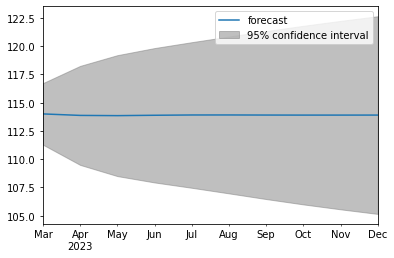

In [29]:
#libreria para la grafica del pronostico
from statsmodels.graphics.tsaplots import plot_predict

#grafica pronostico
plot_predict(resultado2, start='2023-03-01', end='2023-12-01');

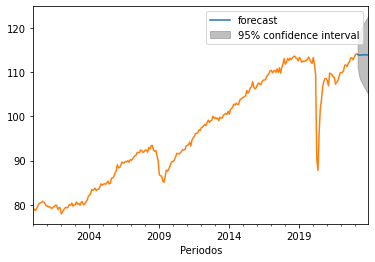

In [30]:
#grafica pronostico
plot_predict(resultado2, start='2023-03-01', end='2023-12-01')
# añade grafica de la serie
igae['IGAE'].plot();